DATAFRAME notebook


In [1]:
import csv
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import time

Member IDs


In [2]:
member_df = pd.read_csv('members_df.csv', header=0)
member_df = member_df.drop(member_df.columns[0], axis=1)

""" 
This is the dataframe of data from members of congress from the years 2013-2020.
you can access the dataframe using the standard pandas dataframe methods

"""
member_df.head()

,year,bioname,chamber,Party Name,ideology,nominate_dim1,House Majority,Senate Majority,Presidency
0,2013,"LEE, Barbara",House,Democratic Party,0.000000,-0.681,Republicans,Democrats,Democrat (Obama)
1,2013,"GRIJALVA, Raúl M.",House,Democratic Party,0.017025,-0.598,Republicans,Democrats,Democrat (Obama)
2,2013,"ELLISON, Keith",House,Democratic Party,0.054949,-0.537,Republicans,Democrats,Democrat (Obama)
3,2013,"RANGEL, Charles B.",House,Democratic Party,0.087907,-0.514,Republicans,Democrats,Democrat (Obama)
4,2013,"CONYERS, John, Jr.",House,Democratic Party,0.093353,-0.658,Republicans,Democrats,Democrat (Obama)


Text

In [2]:
text_dfs = []
start = 1995
end = 2020

for year in range(start, end+1):
    tm = time.strftime('%H:%M:%S', year)
    print(tm)
    yr_dir = os.path.join('../output', str(year))
    for sep in os.listdir(yr_dir):
        json_dir = os.path.join(yr_dir, sep, 'json')
        if not os.path.isdir(json_dir):
            continue
        for json_name in os.listdir(json_dir):  
            json_path = os.path.join(json_dir, json_name)
            try:
                with open(json_path, 'r') as file_obj:
                    data = json.load(file_obj)
                    
                    text_dfs.append((data['header'], pd.DataFrame(data['content'])))
            except Exception as e:
                print(e)

""" 
This is the dataframe of all text scraped from the congressional records website from the years 1995 to 2020.
it is an array consisting of each file. for example, text_dfs[0] signifies the first json file from this list of years.
Each of these json files consists of two parts, the metadata for each file and the actual text content. 
You can access the metadata for example by doing: text_dfs[0][0], which will return a python dictionary of the metadata.
You can access the text by using text_dfs[0][1], which is a pandas dataframe of all text events within the json file.

"""

03:04:38
03:06:03
03:07:04
03:08:08
03:09:11
03:10:21
03:11:50
03:13:29
03:14:50
03:16:43
03:18:03
03:19:46
03:21:07
03:22:29
03:23:31
03:24:54
03:25:46
03:26:55
03:27:48
03:28:50
03:30:21
03:32:04
03:33:31
03:34:31
03:35:19
03:36:50
'utf-8' codec can't decode byte 0xa6 in position 79: invalid start byte


' \nThis is the dataframe of all text scraped from the congressional records website from the years 1995 to 2020.\nit is an array consisting of each file. for example, text_dfs[0] signifies the first json file from this list of years.\nEach of these json files consists of two parts, the metadata for each file and the actual text content. \nYou can access the metadata for example by doing: text_dfs[0][0], which will return a python dictionary of the metadata.\nYou can access the text by using text_dfs[0][1], which is a pandas dataframe of all text events within the json file.\n\n'

In [3]:
text_dfs[0][1].head()

,itemno,kind,speaker,speaker_bioguide,text,turn
0,0,linebreak,None,None,______\n\n,-1
1,1,title,None,None,EXON AMENDMENTS NOS. 2364...,-1
2,2,title,None,None,SEC. 3144. TRANSPORTATION AND STORAGE OF ...,-1
3,3,title,None,None,FUEL AT IDAHO NATIONAL ENGI...,-1
4,4,linebreak,None,None,...,-1


Index

In [4]:
index_df = pd.read_csv('index_df.csv', names=['date', 'year', 'pages', 'label', 'type'])

""" 
This is the dataframe of indices of text locations from 1995 to 2023
the type denotes the topic of each text
uses pandas dataframe
"""
print(len(index_df))
index_df.head()

378294


,date,year,pages,label,type
0,30JA,1995,E214,Constitutional amendments: balance (H.J. Res. 1),budget
1,9MY,1995,S6366,National Agenda of the Republican Party: Edwin...,budget
2,19DE,1995,S18903,Appeal from business leaders to the President ...,budget
3,8DE,1995,E2322,Appeal to the Congress of the United States,budget
4,28FE,1995,S3240,Invitation to Disaster,budget


Index Text

In [5]:
index_text = []
texts_dir = os.listdir('index_text')
texts_dir.sort()

yr_dfs = []
for f in texts_dir:
    path = os.path.join('index_text', f)
    df = pd.read_csv(path, names=['date', 'page', 'speaker', 'label', 'text'])
    yr_dfs.append(df)


index_text_df = pd.concat(yr_dfs, axis=0, ignore_index=True)
""" 
This is the dataframe of text as it corresponds to each index
uses pandas dataframe
"""
index_text_df.head()

,date,page,speaker,label,text
0,01/10/1995,S732,Mr. GRASSLEY | G000386,budget | Constitutional amendments: balance (s...,"Mr. GRASSLEY. Mr. President, let us take a l..."
1,01/10/1995,S731,The RECORDER | None,budget | Public debt: ceiling (see H.R. 2409 ...,"the Record, as follows: ..."
2,01/10/1995,S739,Mr. GRASSLEY | G000386,budget | Constitutional amendments: balance ba...,"Mr. GRASSLEY. Mr. President, let us take a l..."
3,01/10/1995,S688,The RECORDER | None,budget | Deficit,"the Record, as follows: Statement of the Ch..."
4,01/10/1995,S737,The RECORDER | None,budget | Public debt: ceiling inclusion of a d...,By Mr. EXON: S. 189. A bill...


In [6]:
accuracy = len(index_text_df)/len(index_df)

print(accuracy)

0.9460816190581929


Indexed Texts by Topic

In [7]:
topics_data = {}

for index, row in index_text_df.iterrows():
    topic = row['label'][:row['label'].index('|')].strip()
    if topic in topics_data:
        topics_data[topic].append(row)
    else:
        topics_data[topic] = [row]

index_text_topic_dfs = []
topics = []
for topic in topics_data:
    df = pd.DataFrame(topics_data[topic])
    index_text_topic_dfs.append(df)
    topics.append(topic)

"""
This is the list of dataframes of the indexed text for each topic
use index_text_topic_dfs to get each topic separately
topics array contains the list of topics
"""
print(topics[0])
index_text_topic_dfs[0].head()

budget


,date,page,speaker,label,text
0,01/10/1995,S732,Mr. GRASSLEY | G000386,budget | Constitutional amendments: balance (s...,"Mr. GRASSLEY. Mr. President, let us take a l..."
1,01/10/1995,S731,The RECORDER | None,budget | Public debt: ceiling (see H.R. 2409 ...,"the Record, as follows: ..."
2,01/10/1995,S739,Mr. GRASSLEY | G000386,budget | Constitutional amendments: balance ba...,"Mr. GRASSLEY. Mr. President, let us take a l..."
3,01/10/1995,S688,The RECORDER | None,budget | Deficit,"the Record, as follows: Statement of the Ch..."
4,01/10/1995,S737,The RECORDER | None,budget | Public debt: ceiling inclusion of a d...,By Mr. EXON: S. 189. A bill...


Counting percentage of speech of each Congressperson by topic

In [8]:
topic_dfs = []
for topic in topics_data:
    df = pd.DataFrame(topics_data[topic])
    df['year'] = df.apply(lambda x: x['date'][-4:], axis=1)
    
    counts = {}
    for index, row in df.iterrows():
        if row.speaker in counts:
            if row.year in counts[row.speaker]:
                counts[row.speaker][row.year] = counts[row.speaker][row.year] + 1
            else:
                counts[row.speaker][row.year] = 1
        else:
            counts[row.speaker] = {}
            counts[row.speaker][row.year] = 1

    df = pd.DataFrame(counts)
    df = df.transpose()
    df = df.fillna(0)
    df['count'] = df.sum(axis='columns', numeric_only = True)

    topic_dfs.append(df)


In [9]:
for i in range(len(topic_dfs)):
    df = topic_dfs[i]
    topic = topics[i]
    for yr in range(1995, 2020 +1):
        if str(yr) in df.columns:
            total = sum(df[str(yr)])
            df[str(yr) + ' % per year'] = np.round(df[str(yr)]/total*100, 4)
            df[str(yr) + ' % per congressperson'] = np.round(df[str(yr)]/df['count']*100, 4)
            df[str(yr)].astype('int')

    df = df.sort_index(axis=1)
    df.to_csv('topics/'+topic+'.csv')

    topic_dfs[i] = df

In [10]:
""" 
This is the list of dataframes for the count of each topic split into each congressperson
use topics[] to access the name of each topic
use topic_dfs[] to access each dataframe
"""

print(topics[0])
topic_dfs[0].head()

budget


,1995,1995 % per congressperson,1995 % per year,1996,1996 % per congressperson,1996 % per year,1997,1997 % per congressperson,1997 % per year,1998,...,2018,2018 % per congressperson,2018 % per year,2019,2019 % per congressperson,2019 % per year,2020,2020 % per congressperson,2020 % per year,count
Mr. GRASSLEY | G000386,34.0,15.8879,0.5509,2.0,0.9346,0.0687,4.0,1.8692,0.1442,4.0,...,2.0,0.9346,0.2766,9.0,4.2056,0.7401,0.0,0.0000,0.0000,214.0
The RECORDER | None,343.0,11.1219,5.5574,202.0,6.5499,6.9344,163.0,5.2853,5.8760,178.0,...,48.0,1.5564,6.6390,131.0,4.2477,10.7730,28.0,0.9079,9.3023,3084.0
Mr. EXON | E000284,67.0,74.4444,1.0855,23.0,25.5556,0.7896,0.0,0.0000,0.0000,0.0,...,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,90.0
Mr. LIEBERMAN | L000304,15.0,19.4805,0.2430,6.0,7.7922,0.2060,2.0,2.5974,0.0721,0.0,...,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,77.0
Mrs. CLAYTON | C000494,17.0,65.3846,0.2754,5.0,19.2308,0.1716,0.0,0.0000,0.0000,0.0,...,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,26.0


Histograms of text

In [11]:
number_paragraphs = []
number_words = []
words_per_paragraph = []
for index, row in index_text_df.iterrows():
    ct = len(re.findall('.    ', row.text))
    number_paragraphs.append(ct)
    number_words.append(len(row.text.split()))
    words_per_paragraph.extend([len(pr.split()) for pr in row.text.split('.    ')])

Keep outliers:

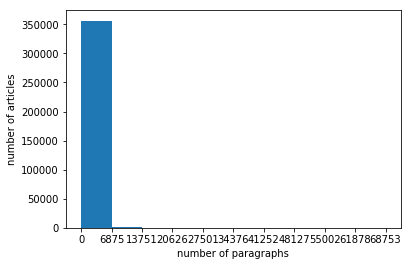

In [12]:
n, bins, edges = plt.hist(number_paragraphs, bins=10)
plt.xticks(bins)
plt.xlabel('number of paragraphs')
plt.ylabel('number of articles')
plt.show() 

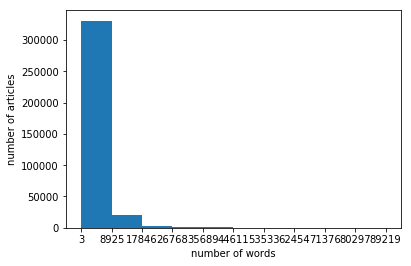

In [13]:
n, bins, edges = plt.hist(number_words, bins=10)
plt.xticks(bins)
plt.xlabel('number of words')
plt.ylabel('number of articles')
plt.show() 

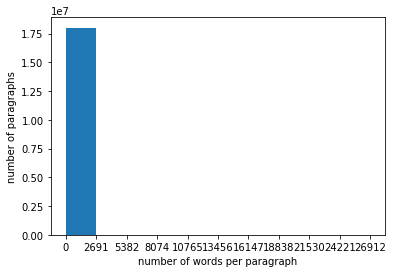

In [14]:
n, bins, edges = plt.hist(words_per_paragraph, bins=10)
plt.xticks(bins)
plt.xlabel('number of words per paragraph')
plt.ylabel('number of paragraphs')
plt.show() 

Ignore outliers:

 over 100 paragraphs
 
 over 10000 words

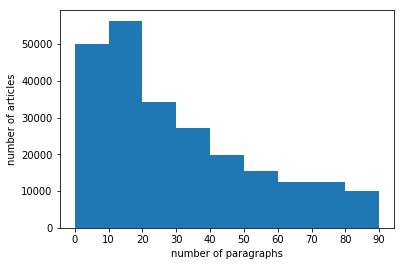

In [15]:
bins = range(0, 100, 10)
n, _, edges = plt.hist(number_paragraphs, bins=bins)
plt.xticks(bins)
plt.xlabel('number of paragraphs')
plt.ylabel('number of articles')
plt.show() 

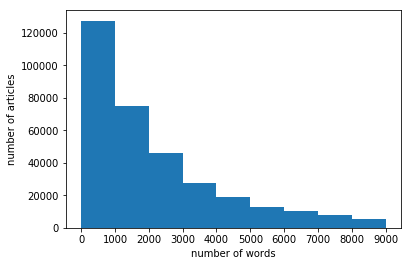

In [16]:
bins = range(0, 10000, 1000)
n, _, edges = plt.hist(number_words, bins=bins)
plt.xticks(bins)
plt.xlabel('number of words')
plt.ylabel('number of articles')
plt.show() 

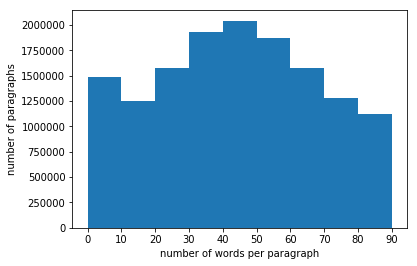

In [17]:
bins = range(0, 100, 10)
n, _, edges = plt.hist(words_per_paragraph, bins=bins)
plt.xticks(bins)
plt.xlabel('number of words per paragraph')
plt.ylabel('number of paragraphs')
plt.show() 

Sample of paragraphs per year

In [18]:
samples_per_year = []
temp_df = index_text_df.copy(deep=True)
temp_df['year'] = temp_df.apply(lambda x: x['date'][-4:], axis=1)
for year in range(1995, 2020+1):
    a = temp_df[temp_df['year'] == str(year)]  
    prs = []
    for i, r in a.iterrows():
        prs.extend(r['text'].split('.    '))
    
    prs = pd.DataFrame(prs)
    if len(prs) < 10:
        samples_per_year.append([year, prs])
    else:
        samples_per_year.append([year, prs.sample(n=10)])

for yr in samples_per_year:
    yr[1].to_csv('sample_paragraphs/sample'+str(yr[0])+'.csv')

samples_per_year[:5]

[[1995,                                                          0
  715406                                  The Senate recedes
  1116808       The House amendment, in section 101, cont...
  1132324  I offered three separate amendments to delete ...
  406140        ``(ii) Removal of medical education and d...
  1195457  How about seafood safety administered by the D...
  53101         In order to get the votes to pass it, I c...
  755181        ``Sec. 13713. Food and grocery transporta...
  762827        ``(7) Suspension or revocation.--Intrasta...
  468574        ``(2) Obligation of shipper.--Nothing in ...
  535221        3. Day-to-day notification of the next da...],
 [1996,                                                         0
  582298                        Changes heading for section
  836366  We are talking, Mr. Speaker, about the deficit...
  434432                 65. Penalties--Limitation on Am...
  713067  Let me conclude, Mr. President, by saying Gove...
  341415     Ho

Number of words per paragraph

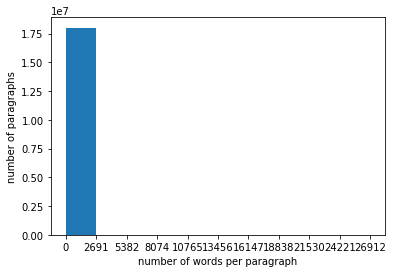

In [19]:
n, bins, edges = plt.hist(words_per_paragraph, bins=10)
plt.xticks(bins)
plt.xlabel('number of words per paragraph')
plt.ylabel('number of paragraphs')
plt.show() 

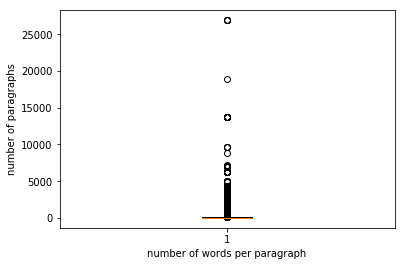

In [20]:
boxes, medians, whiskers, caps, fliers, means = plt.boxplot(words_per_paragraph)
plt.xlabel('number of words per paragraph')
plt.ylabel('number of paragraphs')
plt.show()

In [21]:
print("max: ", max(words_per_paragraph))
print("min: ", min(words_per_paragraph))
print("mean: " + str(sum(words_per_paragraph)/len(words_per_paragraph)))
print("median: " + str(np.median(words_per_paragraph)))
print("standard deviation: ", np.std(words_per_paragraph))

max:  26912
min:  0
mean: 64.61894405455428
median: 53.0
standard deviation:  60.9716527958445


Sample Paragraphs by Topic


In [22]:
for t in range(len(topics)):
    df = index_text_topic_dfs[t]
    samples_per_year = []
    temp_df = df.copy(deep=True)
    temp_df['year'] = temp_df.apply(lambda x: x['date'][-4:], axis=1)
    for year in range(1995, 2020+1):
        a = temp_df[temp_df['year'] == str(year)]  
        prs = []
        for i, r in a.iterrows():
            prs.extend(r['text'].split('.    '))
        
        prs = pd.DataFrame(prs)
        if len(prs) < 10:
            samples_per_year.append([year, prs])
        else:
            samples_per_year.append([year, prs.sample(n=10)])

    for yr in samples_per_year:
        if not os.path.exists('sample_topics/'+topics[t]):
            os.mkdir('sample_topics/'+topics[t])
        yr[1].to_csv('sample_topics/'+topics[t]+'/sample'+str(yr[0])+'.csv')
        if not os.path.exists('sample_topics/alt/'+str(yr[0])):
            os.mkdir('sample_topics/alt/'+str(yr[0]))
        yr[1].to_csv('sample_topics/alt/'+str(yr[0])+'/sample'+topics[t]+'.csv')

    print(samples_per_year[:5])

[[1995,                                                         0
122288  We this year, because we had campaigned for ye...
189442          602)         The House bill contained ...
241869                          B. Conforming Amendmen...
8780    That is ridiculous, because many of these tax ...
107025       3. Indexation of the limitation based on ...
297358  I have been a minority in the majority as I ha...
160233       (b) Section 801A(b)(2) (D.C. Code, sec. 1...
117495       In calculating a State's overall JOBS par...
188270          522)         The Senate amendment cont...
317851             By Mr. HARKIN:         S. 569. A bi...], [1996,                                                         0
152409                                  S. 1729      A...
77241      House bill         ``Work activities'' are ...
111424  There is not a shred of truth in that. I think...
89179        ``(c) Notwithstanding any rights or proce...
60015        The House recedes with an amendment clari.

[[1995,                                                         0
39279   On October 18, the Congressional Budget Office...
109808       ``(c) Exemptions.--         ``(1) From fi...
138668           9. amendments concerning income withh...
87429        (b) The revised budget required by subsec...
132530  Numerous DOD and industry officials have point...
99090        ``(11) Household goods freight forwarder....
62328      House bill         The provision would prov...
110902     2. Eligibility redeterminations and continu...
80000   You have a situation now where the United Stat...
8879    The critics of a balanced budget amendment sai...], [1996,                                                        0
57170  The President's budget fails to institute real...
12252  If our allocation were bigger, I'd still have ...
28552             41. Prohibitions; Requirements--Tim...
49851                                                ...
39930       The Disbursement Unit must be used to col...
428

[[1995,                                                         0
116113  We need to come to grips with why is this bein...
30470   I just say, Mr. President, as the Senator from...
133694  Medicare is a very efficient program. We bash ...
156107                                  Proposal      ...
21833       Sec. 302. Assistance to States Adversely I...
151060     Senate amendment         Requires the DHHS ...
125302       The Senate amendment contained no similar...
91274        When a paragraph or section of a bill bei...
132480                          (2) Single State agenc...
67822   Mr. Speaker, today is not really about today's...], [1996,                                                         0
83933                       Senate amendment         Same
92305        Instead we have an amendment that would e...
31809   As we have been with other legislation, we are...
121784       (b) Waiver of Limitations.--The President...
91648      Senate amendment         Identical to House.